## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [3]:
df = pd.read_csv("ab_data.csv")
df.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [4]:
df.shape[0]

294478

**There are 294478 rows in our dataset**

c. The number of unique users in the dataset.

In [5]:
df.user_id.nunique()

290584

**There are 290584 unique useers in our dataset**

d. The proportion of users converted.

In [6]:
prop_conv = df.converted.mean()
prop_conv

0.11965919355605512

**about 12% of users are converted inspite of the page used** 

e. The number of times the `new_page` and `treatment` don't match.

In [7]:
df_unmatch= df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False]
df_unmatch.shape[0]

3893

**there are 3893 rows where either the page or the group were incorrectly assigned**

f. Do any of the rows have missing values?

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**There are no missing values in our dataset**

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == True]

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# First to check how many repeated users :
sum(df2['user_id'].duplicated())

1

In [13]:
# What is it?
df2[df2.duplicated(['user_id'], keep=False)]['user_id']

1899    773192
2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [14]:
# to get the information for this repeated user id:
df2[df2.duplicated(['user_id'], keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [15]:
df2 = df2.drop_duplicates(subset ="user_id") 

In [16]:
# to check that the duplicated user id was deleted:

df2.user_id.shape[0] == df2.user_id.nunique()

True

**total rows are now equal to the unique rows, then the duplicated row was successfully removed.**

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
# To calculated the probability of all converted users 
prob_conv_all = df2.converted.mean()
print("The probability of an individual converting regardless of the page they receive is: {} %".format(prob_conv_all*100))


The probability of an individual converting regardless of the page they receive is: 11.959708724499627 %


b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# To calculated the conversion probability of Control Group 
prob_conv_control = df2[df2['group'] == 'control'].converted.mean()
print("The probability of an individual in the control group converting is: {} %".format(prob_conv_control*100))

The probability of an individual in the control group converting is: 12.03863045004612 %


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
prob_conv_treatment = df2[df2['group'] == 'treatment'].converted.mean()
print("The probability of an individual in the treatment group converting is: {} %".format(prob_conv_treatment*100))

The probability of an individual in the treatment group converting is: 11.880806551510565 %


d. What is the probability that an individual received the new page?

In [20]:
prob_new_page = df2[df2['landing_page'] == 'new_page'].shape[0] / df2.shape[0]
print("The probability that an individual received the new page is: {} %".format(prob_new_page*100))

The probability that an individual received the new page is: 50.00619442226688 %


**It seems that the data is balanced regarding page assignment to visitors (50% each)**

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Answer:**  
* The new page was assigned to half of the visitors and hence the study seems to be balanced.  
* The conversion rate for the new page is quite similar or even slightly lower than that of the old page. Therefore, up to this point I think there is no sufficient evidence that the new treatment page leads to more conversions.  
* However, Other confounding factors loke change version and time span are not considered, so we should make more investigations  to make a good decision. 


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Answer:**  

$$ H_0: p_{new} \leq p_{old} $$  
$$ H_1: p_{new}  > p_{old} $$ 


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [21]:
# Conversion rate for the new page under the null:
p_new_null = df2.converted.mean()
p_new_null

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [22]:
# Conversion rate for the old page under the null:
p_old_null = df2.converted.mean()
p_old_null

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [24]:
n_new = df2.query('group == "treatment"').shape[0]
print("The number of individuals in the treatment group is: {}".format(n_new))

The number of individuals in the treatment group is: 145310


d. What is $n_{old}$, the number of individuals in the control group?

In [25]:
n_old = df2.query('group == "control"').shape[0]
print("The number of individuals in the control group is: {}".format(n_old))

The number of individuals in the control group is: 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [55]:
# New Page simulation:
new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new_null, (1- p_new_null)]).mean()


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [56]:
# Old page simulation:
old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old_null, (1- p_old_null)]).mean()


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [61]:
new_page_converted - old_page_converted


0.00106477765450666

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [76]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([1,0], size = n_new, p = [p_new_null, (1- p_new_null)]).mean()
    old_page_converted = np.random.choice([1,0], size = n_old, p = [p_old_null, (1- p_old_null)]).mean()
    diff = new_page_converted - old_page_converted
    p_diffs.append(diff)

In [83]:
p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

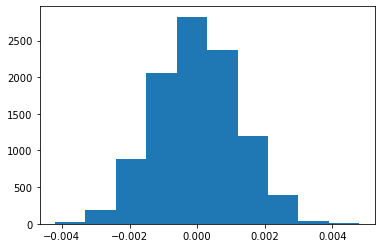

In [115]:
plt.hist(p_diffs);

**The plot looks like normal distribution as expected. according to the CLT, sampling distribution will follow the normal distribution as the sample size gets large. Our sample size here is large.**

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [116]:
# The actual Difference  from the above calculated conversion rates:
actual_diff = prob_conv_treatment - prob_conv_control
actual_diff

-0.0015782389853555567

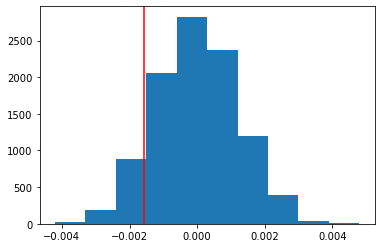

In [89]:
plt.hist(p_diffs);
plt.axvline(actual_diff, color = 'red');

In [117]:
# The proportions of p_diffs are greater than the actual diff. (p-value)

(p_diffs > actual_diff).mean()

0.9033

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Answer:**  
* The red line represent the value of our statistic (The actual difference observed in data).  
* The value calculated in part **J** represent the shaded area starting from our statistic through the tail of the distribution (The proportions of the simulated difference under the null that is greater than our statistic). this value is actually the p-value.  
* As the calculated p-value is 0.9 so the probability that our statistics come from the distribution under the null is 90%.  
* As the p-value is large, then we have no strong evidence in favor of the alternative hypothesis and  we fail to reject the null hypothesis (That the old page is better than or at least as good as the new one).

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [90]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [92]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Answer:**  
* The z-score represents how far our statistic from the distribution mean in terms of standard deviations.
* The calculated z-score and p-values mean that about 90% of the data falls within 1.3 SD from the mean and hence our statistic is 90% likely to come from the null.  
* These findings agree with the findings in parts **J** and **K** that we fail to reject the null.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**
* The suitable regression here is **Logistic Regression**.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [93]:
# adding intercept and dummy variables to our dataset:
df2['intercept'] = 1

df2[['control', 'treatment']] = pd.get_dummies(df2['group'])

In [95]:
# Checking:
df2.head(5)

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [97]:
model = sm.Logit(df2['converted'], df2[['intercept', 'treatment']])
results = model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [98]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        01:37:12   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
treatment     -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Answer:**  
* The p-value = 0.19.  
* It differs from that calculated in partII due to the difference in settings the null and alternative.  
* In Part II, the null was that the old page is better than or as good as the new one, and the alternative was the new page is better than the old one (one-tailed).  
* In this part, the settings is:  
$$ H_0: p_{new} = p_{old} $$  
$$ H_1: p_{new}  \neq p_{old} $$   
* In this part our null was that there is no difference between the two pages, while the alternative was that the two pages are different (whatever the direction of difference).  
* Although the settings and values are different, but the same conclusion was drawn from both parts, that we failed to reject the null and there is no evidence that the new page is better than the old one.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer:**  
* Adding other factors that may influence the investigated response may make the picture more clear, as there may be interaction between factors ( i,e. The effect of one variable on the response may be dependent on the level of another variable).  
* Also investigating all factors that may affect the response enable us to explain higher proportions of the variability in that response and make our future prediction more accurate.  
* However, adding many fators in the regression model may lead to some problems, for example:  
   * Adding many variables in the model may lead to difficulty in interpreting the coefficients and the result.
   * If there is a multicollinearity between the explanatory variables may lead to unreliable results and incorrect conclusions.
   * Inclusion higher order terms may also impact our ability to interpret coefficients.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [100]:
countries = pd.read_csv('countries.csv')
df3 = countries.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df3.head(5)

,country,timestamp,group,landing_page,converted,intercept,control,treatment
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1


In [102]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   country       290584 non-null  object
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
 5   intercept     290584 non-null  int64 
 6   control       290584 non-null  uint8 
 7   treatment     290584 non-null  uint8 
dtypes: int64(2), object(4), uint8(2)
memory usage: 16.1+ MB


In [105]:
# investigate values for country:

df3.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [107]:
# Create the  dummy variables for countries
df3[['UK', 'US', 'CA']] = pd.get_dummies(df3['country'])
df3.head(5)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,US,CA
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [111]:
# Then we fit the model using US as a baseline:
## add intercept:
df3['intercept'] = 1

## fitting the model
model2 = sm.Logit(df3['converted'], df3[['intercept', 'treatment','CA', 'UK']])
results2 = model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        02:25:59   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9794      0.013   -155.415      0.000      -2.004      -1.954
treatment     -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0099      0.013     -0.743      0.457      -0.036       0.016
UK            -0.0506      0.028     -1.784      0.074      -0.106       0.005
==============================================================================
"""

**Answer:**  
* It seems that the country has no statistically significant effect on conversion at 0.05 significance level, as the p-values for both "CA" and "UK" are greater than 0.05 (0.457 and 0.074 respectively). The landing page is still non-significant after adding the country to the model (p=0.191). 

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [112]:
# Creating interaction variable columns:

df3['CA_treatment'] = df3['treatment']* df3['CA']
df3['UK_treatment'] = df3['treatment']* df3['UK']
df3['US_treatment'] = df3['treatment']* df3['US']
df3.head(5)

,country,timestamp,group,landing_page,converted,intercept,control,treatment,UK,US,CA,CA_treatment,UK_treatment,US_treatment
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,0,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,0,0,1


In [113]:
# Fitting the new model with interaction terms included:
model3 = sm.Logit(df3['converted'], df3[['intercept','treatment','CA_treatment','UK_treatment','CA','UK']])

results3 = model3.fit()

results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Mon, 15 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        02:57:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       -1.9922      0.016   -123.457      0.000      -2.024      -1.961
treatment        0.0108      0.023      0.475      0.635      -0.034       0.056
CA_treatment    -0.0314      0.027     -1.181      0.238      -0.084       0.021
UK_treatment    -0.0783      0.057     -1.378      0.168      -0.190       0.033
CA               0.0057      0.019      0.306      0.760      -0.031       0.043
UK              -0.0118      0.040     -0.296      0.767      -0.090       0.066
================================================================================
"""

After adding the interaction terms between country and page to the models , all variables and interactions had no significant effects on the conversion rate. This means that the effect of landing page did not changed from country to country and still non-significant in all cases. also the country of residence did not affect the conversion rate. 

<a id='conclusions'></a>
## Conclusion:

> * After testing the difference between conversion rate for the new and old page using both hypothesis testing and logistic regression, it seems that there is no statistically significant difference between the two pages.
> * Even after including the country at which the user lives in, the results did not change with respect of the main effect of page and country or even the interaction between them on the conversion rate.
> * These results suggested that there is no evidence to support the shift from the old page to the new one, or otherwise the company may need to do more investigations to assess factors that may affect the conversion rate.  
> * Finally, we should aknowledge that these conclusions are based the available data. Other factors that are hidden from us may lead to changing conclusions.
